Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [8]:
# https://www.kaggle.com/himanshupadhiar/toyota-price-prediction-with-regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter

In [5]:
data_df = pd.read_csv("D:/DataScience/regression/multilinear-toyotacorolla/ToyotaCorolla.csv",  encoding= 'unicode_escape')

In [6]:
data_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [22]:
data_df.drop(['Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Central_Lock','Powered_Windows'] ,axis=1)

,Id,Price,Age_08_04,KM,HP,Color,Automatic,cc,Doors,Cylinders,...,Boardcomputer,CD_Player,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,46986,90,Blue,0,2000,3,4,...,1,0,1,0,0,0,1,0,0,0
1,2,13750,23,72937,90,Silver,0,2000,3,4,...,1,1,1,0,0,0,1,0,0,0
2,3,13950,24,41711,90,Blue,0,2000,3,4,...,1,0,1,0,0,0,1,0,0,0
3,4,14950,26,48000,90,Black,0,2000,3,4,...,1,0,1,0,0,0,1,0,0,0
4,5,13750,30,38500,90,Black,0,2000,3,4,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,20544,86,Blue,0,1300,3,4,...,0,0,1,0,1,1,1,0,0,0
1432,1439,10845,72,19000,86,Grey,0,1300,3,4,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,17016,86,Blue,0,1300,3,4,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,16916,86,Grey,0,1300,3,4,...,0,0,0,0,0,0,1,0,0,0


In [25]:
data_df = data_df[['Price', 'Age_08_04','KM','HP','Color','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [26]:
data_df.count()

Price            1436
Age_08_04        1436
KM               1436
HP               1436
Color            1436
cc               1436
Doors            1436
Gears            1436
Quarterly_Tax    1436
Weight           1436
dtype: int64

In [27]:
data_df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [28]:
data_df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
Color            0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [29]:
data_df.head()

,Price,Age_08_04,KM,HP,Color,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,Blue,2000,3,5,210,1165
1,13750,23,72937,90,Silver,2000,3,5,210,1165
2,13950,24,41711,90,Blue,2000,3,5,210,1165
3,14950,26,48000,90,Black,2000,3,5,210,1165
4,13750,30,38500,90,Black,2000,3,5,210,1170


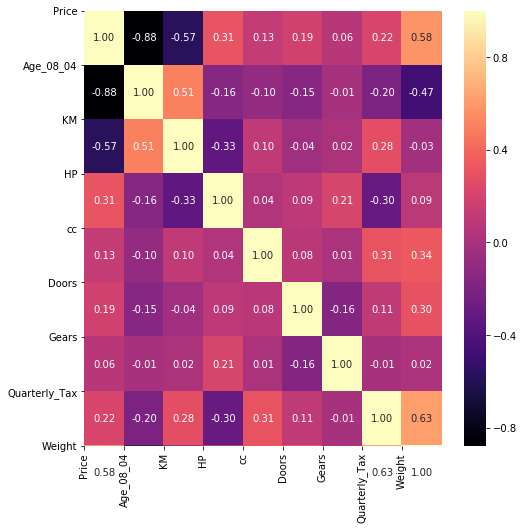

In [31]:
# Check Correlation amongst parameters
corr = data_df.corr()
fig, ax = plt.subplots(figsize=(8,8))


# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()


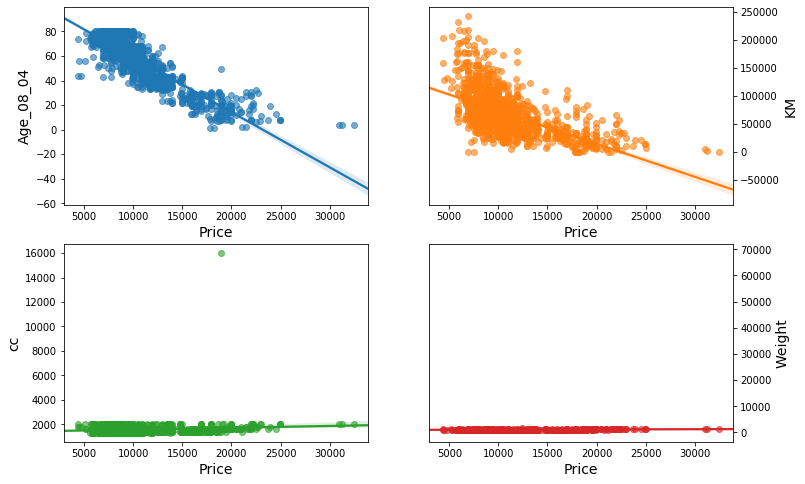

In [33]:
# plot regplots  for Age, KM, CC & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age_08_04', data = data_df, ax = axes[0,0], scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age_08_04', fontsize=14)
axes[0,0].yaxis.tick_left()


# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = data_df, ax = axes[0,1], scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'cc', data = data_df, ax = axes[1,0], scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('cc', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = data_df, ax = axes[1,1], scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

In [34]:
data_df = pd.get_dummies(data_df)

In [35]:
data_df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,13500,23,46986,90,2000,3,5,210,1165,0,0,1,0,0,0,0,0,0,0
1,13750,23,72937,90,2000,3,5,210,1165,0,0,0,0,0,0,1,0,0,0
2,13950,24,41711,90,2000,3,5,210,1165,0,0,1,0,0,0,0,0,0,0
3,14950,26,48000,90,2000,3,5,210,1165,0,1,0,0,0,0,0,0,0,0
4,13750,30,38500,90,2000,3,5,210,1170,0,1,0,0,0,0,0,0,0,0


Regression Models

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X_simple_lreg = data_df[["Age_08_04"]].values
y_simple_lreg = data_df["Price"].values

print(X_simple_lreg[0:5])
print(y_simple_lreg[0:5])

[[23]
 [23]
 [24]
 [26]
 [30]]
[13500 13750 13950 14950 13750]


In [38]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_slreg, X_test_slreg, y_train_slreg, y_test_slreg = train_test_split(X_simple_lreg,y_simple_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_slreg.shape, y_train_slreg.shape)
print('Test Dataset : ', X_test_slreg.shape, y_test_slreg.shape)


Train Dataset :  (1077, 1) (1077,)
Test Dataset :  (359, 1) (359,)


In [39]:
simple_lreg = LinearRegression()
simple_lreg.fit(X_train_slreg, y_train_slreg)
print('Intercept : ', simple_lreg.intercept_)
print('Slope : ', simple_lreg.coef_)


Intercept :  20137.410273159752
Slope :  [-169.09157285]


In [40]:
# Use the model to predict the test dataset.
y_simplelreg_pred_test = simple_lreg.predict(X_test_slreg)

# Use the model to predict the train dataset.
y_simplelreg_pred_train = simple_lreg.predict(X_train_slreg)

In [41]:
# Calculate the eualuation metrics of the model.


from sklearn.metrics import r2_score
r2_score_slreg_train = r2_score(y_simplelreg_pred_train, y_train_slreg)
r2_score_slreg_test = r2_score(y_simplelreg_pred_test, y_test_slreg)
rmse_slreg = np.sqrt(mean_squared_error(y_simplelreg_pred_test, y_test_slreg)**2)
print('r2_ score for train dataset for simple linear reg : ', r2_score_slreg_train)
print('r2_ score for test dataset for simple linear reg : ', r2_score_slreg_test)
print('root mean squared error for simple linear reg : ', rmse_slreg)



r2_ score for train dataset for simple linear reg :  0.6978153650611345
r2_ score for test dataset for simple linear reg :  0.6734388905656996
root mean squared error for simple linear reg :  3438902.3311535786


Multiple Regression

In [42]:
# Separating the independent and dependent variable.
X_multi_lreg = data_df.drop('Price', axis = 1).values
y_multi_lreg = data_df["Price"].values.reshape(-1,1)

In [43]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_mlreg, X_test_mlreg, y_train_mlreg, y_test_mlreg = train_test_split(X_multi_lreg,y_multi_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_mlreg.shape, y_train_mlreg.shape)
print('Test Dataset : ', X_test_mlreg.shape, y_test_mlreg.shape)


Train Dataset :  (1077, 18) (1077, 1)
Test Dataset :  (359, 18) (359, 1)


In [44]:
multi_lreg = LinearRegression()
multi_lreg.fit(X_train_mlreg, y_train_mlreg)
print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_)


Intercept :  [-6783.24605575]
Slope :  [[-1.18581164e+02 -2.05872320e-02  2.96882858e+01 -5.60892155e-02
   1.51422169e+01  7.06512606e+02  2.39937077e+00  1.74790504e+01
  -7.64439371e+02  2.49041156e+02  8.19598932e+01 -1.48913804e+02
   1.95880947e+02 -1.40293302e+02  2.04862126e+02  1.41708780e+03
  -6.88342688e+02 -4.06842755e+02]]


In [45]:


# Use the model to predict the test dataset.
y_mlreg_pred_test = multi_lreg.predict(X_test_mlreg)

# Use the model to predict the train dataset.
y_mlreg_pred_train = multi_lreg.predict(X_train_mlreg)



In [48]:
# Have a look at the predicted & actual values.
print(y_mlreg_pred_test[0:5])
print(y_test_mlreg[0:5])

print(y_mlreg_pred_train[0:5])
print(y_train_mlreg[0:5])

[[ 7970.13805128]
 [ 9761.56945006]
 [ 9697.42854712]
 [11766.82999695]
 [ 8611.56556527]]
[[8950]
 [9850]
 [8250]
 [9750]
 [9250]]
[[10430.42832052]
 [ 6153.27176329]
 [11714.1345476 ]
 [13770.31053774]
 [ 8474.84992942]]
[[ 8900]
 [ 8250]
 [10450]
 [13500]
 [ 8250]]


In [49]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_mlreg_train = r2_score(y_mlreg_pred_train, y_train_mlreg)
r2_score_mlreg_test = r2_score(y_mlreg_pred_test, y_test_mlreg)
rmse_mlreg = np.sqrt(mean_squared_error(y_mlreg_pred_test, y_test_mlreg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_mlreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg_test)
print('root mean squared error for multi linear reg : ', rmse_mlreg)

r2_ score for train dataset for multi linear reg :  0.8397886385351645
r2_ score for test dataset for multi linear reg :  0.8543621557310451
root mean squared error for multi linear reg :  1775123.1044552033


Ridge Regression 

In [50]:
# 2nd degree polynomial regression.

# Separating the independent and dependent variable.
X_ridge_reg = data_df.drop('Price', axis = 1).values
y_ridge_reg = data_df["Price"].values.reshape(-1,1)

In [51]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_ridge_reg, X_test_ridge_reg, y_train_ridge_reg, y_test_ridge_reg = train_test_split(X_ridge_reg,y_ridge_reg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_ridge_reg.shape, y_train_ridge_reg.shape)
print('Test Dataset : ', X_test_ridge_reg.shape, y_test_ridge_reg.shape)


Train Dataset :  (1077, 18) (1077, 1)
Test Dataset :  (359, 18) (359, 1)


In [52]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train_ridge_reg,y_train_ridge_reg)

# Use the model to predict the test dataset.
y_ridgereg_pred_test = ridgeReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_ridgereg_pred_train = ridgeReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_ridgereg_train = r2_score(y_ridgereg_pred_train, y_train_ridge_reg)
r2_score_ridgereg_test = r2_score(y_ridgereg_pred_test, y_test_ridge_reg)
rmse_ridgereg = np.sqrt(mean_squared_error(y_ridgereg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_ridgereg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_ridgereg_test)
print('root mean squared error for multi linear reg : ', rmse_ridgereg)      
      

r2_ score for train dataset for multi linear reg :  0.8291435155210412
r2_ score for test dataset for multi linear reg :  0.8427176111891461
root mean squared error for multi linear reg :  1805335.4722451728


Lasso Regression

In [53]:
from sklearn.linear_model import Lasso

## training the model

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train_ridge_reg,y_train_ridge_reg)

# Use the model to predict the test dataset.
y_lassoreg_pred_test = lassoReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_lassoreg_pred_train = lassoReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_lassoreg_train = r2_score(y_lassoreg_pred_train, y_train_ridge_reg)
r2_score_lassoreg_test = r2_score(y_lassoreg_pred_test, y_test_ridge_reg)
rmse_lassoreg = np.sqrt(mean_squared_error(y_lassoreg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_lassoreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_lassoreg_test)
print('root mean squared error for multi linear reg : ', rmse_lassoreg)



r2_ score for train dataset for multi linear reg :  0.8381672046886008
r2_ score for test dataset for multi linear reg :  0.8522676521902434
root mean squared error for multi linear reg :  1784590.6960962224


In [54]:
from sklearn.linear_model import ElasticNet

## training the model

elasticNetReg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=True)

elasticNetReg.fit(X_train_ridge_reg,y_train_ridge_reg)

# Use the model to predict the test dataset.
y_elasticNetReg_pred_test = elasticNetReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_elasticNetReg_pred_train = elasticNetReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_elasticNetReg_train = r2_score(y_elasticNetReg_pred_train, y_train_ridge_reg)
r2_score_elasticNetReg_test = r2_score(y_elasticNetReg_pred_test, y_test_ridge_reg)
rmse_elasticNetReg = np.sqrt(mean_squared_error(y_lassoreg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_elasticNetReg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_elasticNetReg_test)
print('root mean squared error for multi linear reg : ', rmse_elasticNetReg)



r2_ score for train dataset for multi linear reg :  -87644.53622098321
r2_ score for test dataset for multi linear reg :  -96497.68931696941
root mean squared error for multi linear reg :  1784590.6960962224


 Decision Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor
## training the model

DecisionTreeReg = DecisionTreeRegressor(random_state=0)

DecisionTreeReg.fit(X_train_ridge_reg,y_train_ridge_reg)

# Use the model to predict the test dataset.
y_DecisionTreeReg_pred_test = DecisionTreeReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_DecisionTreeReg_pred_train = DecisionTreeReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_DecisionTreeReg_train = r2_score(y_DecisionTreeReg_pred_train, y_train_ridge_reg)
r2_score_DecisionTreeReg_test = r2_score(y_DecisionTreeReg_pred_test, y_test_ridge_reg)
rmse_DecisionTreeReg = np.sqrt(mean_squared_error(y_DecisionTreeReg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_DecisionTreeReg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_DecisionTreeReg_test)
print('root mean squared error for multi linear reg : ', rmse_DecisionTreeReg)




r2_ score for train dataset for multi linear reg :  1.0
r2_ score for test dataset for multi linear reg :  0.8617556350405784
root mean squared error for multi linear reg :  2137595.409470752


 Random Forest Regression 

In [56]:
from sklearn.ensemble import RandomForestRegressor
## training the model

RandomForestReg = RandomForestRegressor(n_estimators = 1200, random_state=0)

RandomForestReg.fit(X_train_ridge_reg,y_train_ridge_reg.ravel())


# Use the model to predict the test dataset.
y_RandomForestReg_pred_test = DecisionTreeReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_RandomForestReg_pred_train = DecisionTreeReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_RandomForestReg_train = r2_score(y_RandomForestReg_pred_train, y_train_ridge_reg)
r2_score_RandomForestReg_test = r2_score(y_RandomForestReg_pred_test, y_test_ridge_reg)
rmse_RandomForestReg = np.sqrt(mean_squared_error(y_RandomForestReg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_RandomForestReg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_RandomForestReg_test)
print('root mean squared error for multi linear reg : ', rmse_RandomForestReg)



r2_ score for train dataset for multi linear reg :  1.0
r2_ score for test dataset for multi linear reg :  0.8617556350405784
root mean squared error for multi linear reg :  2137595.409470752


 Measuring the Error 

In [57]:
Models = [('Simple Linear Regression', r2_score_slreg_train, r2_score_slreg_test, rmse_slreg),
          ('Multiplt Linear Regression', r2_score_mlreg_train, r2_score_mlreg_test, rmse_mlreg),
          ('Ridge Regression', r2_score_ridgereg_train, r2_score_ridgereg_test, rmse_ridgereg),
          ('Lasso Regression', r2_score_lassoreg_train, r2_score_lassoreg_test, rmse_lassoreg),
          ('Elastic Net Regression', r2_score_elasticNetReg_train, r2_score_elasticNetReg_test, rmse_elasticNetReg),
          ('Decision Tree Regressor', r2_score_DecisionTreeReg_train, r2_score_DecisionTreeReg_test, rmse_DecisionTreeReg),
          ('Random Forest Regressor', r2_score_RandomForestReg_train, r2_score_RandomForestReg_test, rmse_RandomForestReg)]


In [58]:
predict = pd.DataFrame(data = Models, columns = ['Models', 'r2_score Training', 'r2_score Testing', 'RMSE'])
predict

,Models,r2_score Training,r2_score Testing,RMSE
0,Simple Linear Regression,0.697815,0.673439,3.438902e+06
1,Multiplt Linear Regression,0.839789,0.854362,1.775123e+06
2,Ridge Regression,0.829144,0.842718,1.805335e+06
3,Lasso Regression,0.838167,0.852268,1.784591e+06
4,Elastic Net Regression,-87644.536221,-96497.689317,1.784591e+06
5,Decision Tree Regressor,1.000000,0.861756,2.137595e+06
6,Random Forest Regressor,1.000000,0.861756,2.137595e+06


 Visualizing the evaluation metrics of the models

(0, 1.0)

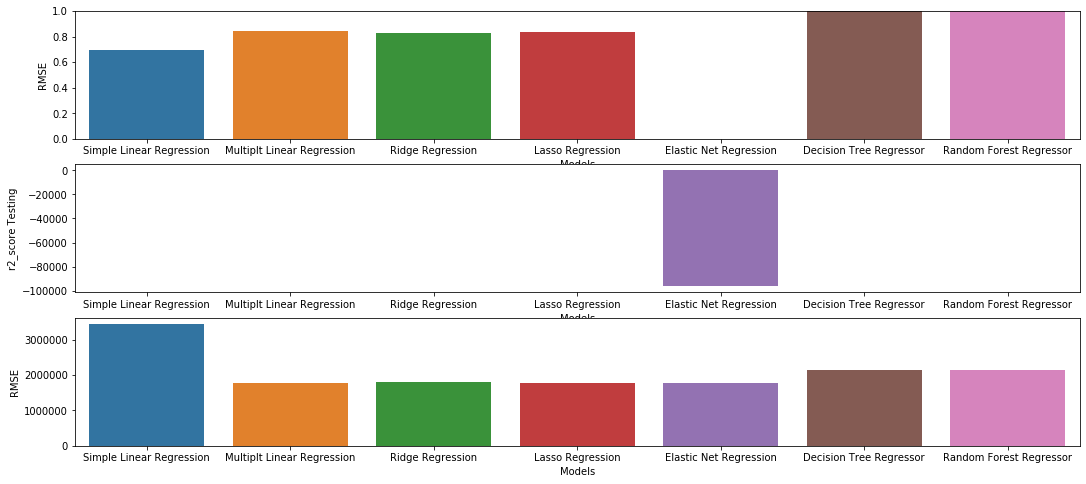

In [59]:
f, axes = plt.subplots(3,1, figsize=(18,8))

sns.barplot(x='Models', y='r2_score Training', data = predict, ax = axes[0])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('r2_score Training')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='r2_score Testing', data = predict, ax = axes[1])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('r2_score Testing')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='RMSE', data = predict, ax = axes[2])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0,1.0)

